In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install qiskit==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.7 MB/s eta 0:00:00


In [ ]:
!pip show qiskit

Name: qiskit
Version: 1.3.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: 


In [ ]:
!pip install qiskit_machine_learning==0.8.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136897 sha256=731e1145d9219044ea51fc925bc14eb4c569fdaf7edaee4b9bbef2ec636313e8
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
!pip install qiskit qiskit-machine-learning torchvision --quiet


In [ ]:
!pip install qiskit qiskit-aer==0.13.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 122.3 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.8 MB/s eta 0:00:00


# Library

In [ ]:
import json
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit,transpile
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap,ZZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from qiskit_machine_learning.optimizers import SPSA,NFT
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator as AerEstimator
from sklearn.utils import class_weight
#from imblearn.over_sampling import RandomOverSampler

algorithm_globals.random_seed = 12345
estimator = Estimator()

# 2.1 Quantum convolution neural network

#2. Image Preprocessing Utility

In [ ]:
# # # To cheack all file formate
import os
for root,dirs,files in os.walk("/content/drive/MyDrive/tumr/modtum.zip"):
   for file in files:
     print(os.path.join(root,file))

In [ ]:
# import zipfile
# zip_path="/content/drive/MyDrive/tumr/modtum.zip"
# # Unzip
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/tumr/Tumor')
#     print("Unzip to folder: /content/drive/MyDrive/tumr/Tumor/")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/tumr/modtum.zip'

In [ ]:
import os
from PIL import Image
from torchvision import transforms
import numpy as np

# Resize & convert image to [0, π] range features
def encode_image_to_features(img_path, image_size):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.Grayscale(),
        transforms.ToTensor()
    ])
    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).squeeze()
    normalized = img_tensor.numpy() * np.pi
    return normalized.flatten()  # 1D array for feature map


# 3. Load All Images from Folder

In [ ]:
import os
import cv2
import numpy as np

def load_dataset(base_path, img_size=(2, 2)):
    images = []
    labels = []

    # Tumor (label: 1)
    tumor_path = os.path.join(base_path, "yes_tumor")
    for img_file in os.listdir(tumor_path):
        img_path = os.path.join(tumor_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(1)
        else:
            print(f"❌ Could not read image (tumor): {img_path}")

    # No Tumor (label: 0)
    no_tumor_path = os.path.join(base_path, "no_tumor")
    for img_file in os.listdir(no_tumor_path):
        img_path = os.path.join(no_tumor_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(0)
        else:
            print(f"❌ Could not read image (no_tumor): {img_path}")

    return np.array(images), np.array(labels)

# path dataset
dataset_path = "/content/drive/MyDrive/Tumor/Br35H-Mask-qCNN"
X, y = load_dataset(dataset_path)
print(f"Size of dataset: {X.shape}, Label: {y.shape}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tumor/Br35H-Mask-qCNN/yes_tumor'

In [ ]:
# Train and test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def image_to_4qubits(image):
  downsampled=cv2.resize(image,(2,2))
  angle=(downsampled.flatten() /255.0)*np.pi/2   # [0,pi/2]
  return angle
# Prepare the dataset to encode form
X_train_qcnn = np.array([image_to_4qubits(img) for img in X_train])
X_test_qcnn = np.array([image_to_4qubits(img) for img in X_test])
# To save the dataset
np.save('X_train_qcnn.npy', X_train_qcnn)
np.save('X_test_qcnn.npy', X_test_qcnn)
np.save('y_train.npy', y_train)  # save this if required
np.save('y_test.npy', y_test)
#To save in the form of pickle file
with open('X_train_qcnn.pkl', 'wb') as f:
    pickle.dump(X_train_qcnn, f)
with open('X_test_qcnn.pkl', 'wb') as f:
    pickle.dump(X_test_qcnn, f)
with open('y_train.pkl', 'wb') as f:
    pickle.dump(X_train_qcnn, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(X_test_qcnn, f)


print(f"Processed train data shape: {X_train_qcnn.shape}")
print(f"Processed test data shape: {X_test_qcnn.shape}")
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_qcnn)
X_test_scaled = scaler.transform(X_test_qcnn)
# To save Scaler
with open('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)
# To fit the PCA
pca = PCA(n_components=4)  # Top 4 feature
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# To save the PCA
with open ('pca.pkl','wb') as f:
  pickle.dump(pca,f)
print(f"Original train data shape: {X_train_pca.shape}, Labels: {y_train.shape}")
print(f"\nOriginal test data shape: {X_test_pca.shape}, Labels: {y_test.shape}")


Processed train data shape: (2100, 4)
Processed test data shape: (900, 4)
Original train data shape: (2100, 4), Labels: (2100,)

Original test data shape: (900, 4), Labels: (900,)


# To rotation all qubit

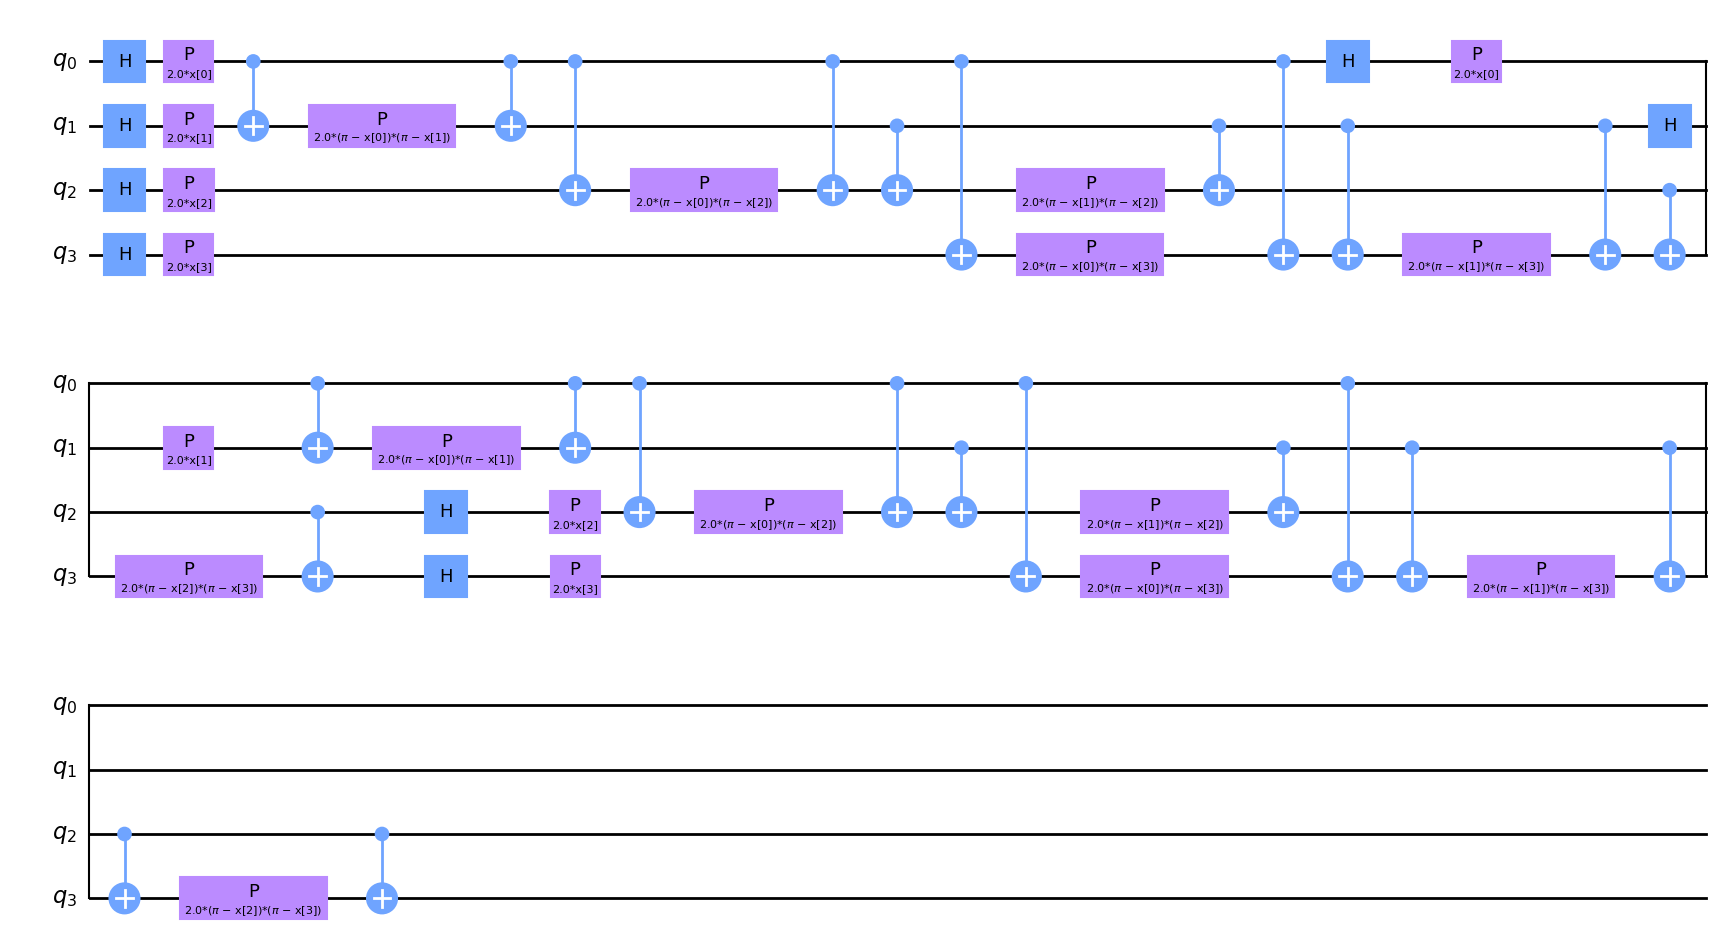

In [ ]:
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZFeatureMap
import pylatexenc
n_qubits = 4
feature_map = ZZFeatureMap(n_qubits,reps=2,entanglement='full')
feature_map.decompose().draw("mpl", style="clifford")

# To train our QCNN model

In [ ]:
# === Define a convolutional layer for 4 qubits ===
def conv_layer(n_qubits, layer_name="conv"):
    qc = QuantumCircuit(n_qubits, name=layer_name)
    params = ParameterVector(layer_name, n_qubits * 2)

    for i in range(n_qubits):
        qc.rx(params[i], i)
        qc.rz(params[i + n_qubits], i)

    return qc

# === Define a pooling layer ===
def pool_layer(source_qubits, target_qubits, layer_name="pool"):
    qc = QuantumCircuit(max(max(source_qubits), max(target_qubits)) + 1, name=layer_name)
    for s, t in zip(source_qubits, target_qubits):
        qc.cx(s, t)
    return qc

# === Build the quantum convolutional neural network ===
n_qubits = 4
feature_map = ZZFeatureMap(n_qubits,reps=2,entanglement='full')

# Build ansatz
ansatz = QuantumCircuit(n_qubits, name="Ansatz")

# Conv Layer 1
ansatz.compose(conv_layer(n_qubits, "c1"), range(n_qubits), inplace=True)

# Pool Layer 1: pool 0->1 and 2->3 (reduce effective qubits)
ansatz.compose(pool_layer([0, 2], [1, 3], "p1"), range(n_qubits), inplace=True)

# Conv Layer 2: only on qubits 1 and 3 now
ansatz.compose(conv_layer(2, "c2"), [1, 3], inplace=True)

# Pool Layer 2: pool 1->3 (final)
ansatz.compose(pool_layer([1], [3], "p2"), range(n_qubits), inplace=True)

# Final circuit = feature map + ansatz
circuit = QuantumCircuit(n_qubits)
circuit.compose(feature_map, range(n_qubits), inplace=True)
circuit.compose(ansatz, range(n_qubits), inplace=True)

# Define observable (you can choose other Z-based observables)
observable = SparsePauliOp.from_list([("Z" +"I"* (n_qubits-1), 1)])

# Estimator object (you must define it)
estimator = Estimator()
#estimator = Estimator(backend=AerSimulator(method='statevector'))
# aer_estimator = AerEstimator(
#     backend_options={
#         "method": "statevector",
#         "device": "CPU"
#     },
#     run_options={
#         "shots": 1024
#     }
# )


# EstimatorQNN
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    estimator=estimator,
    input_gradients=True
)
# Draw the circuit
circuit.decompose().draw(output="mpl",style="clifford")
plt.show()

# Circut of convolution Network


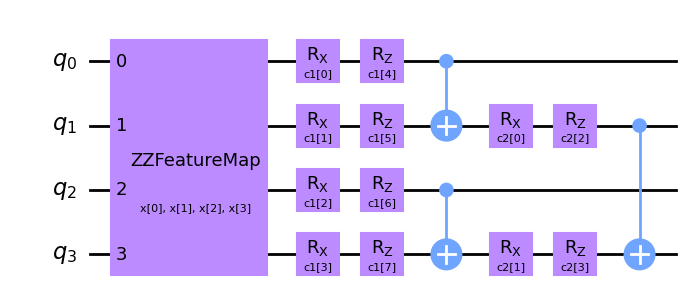

In [ ]:
circuit.draw("mpl", style="clifford")

# Define a callback function to use when training our model. This allows us to view and plot the loss function per each iteration in our training process.

# To see the dataset imgshow

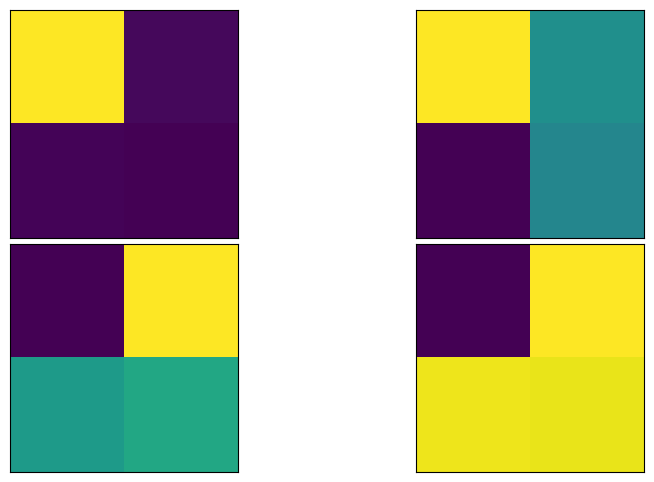

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for i in range(4):
    ax[i // 2, i % 2].imshow(
        X_train_pca[i].reshape(2, 2),  # Change back to 2 by 4
        aspect="equal",
    )
plt.subplots_adjust(wspace=0.1, hspace=0.025)

# To define the initalize the function

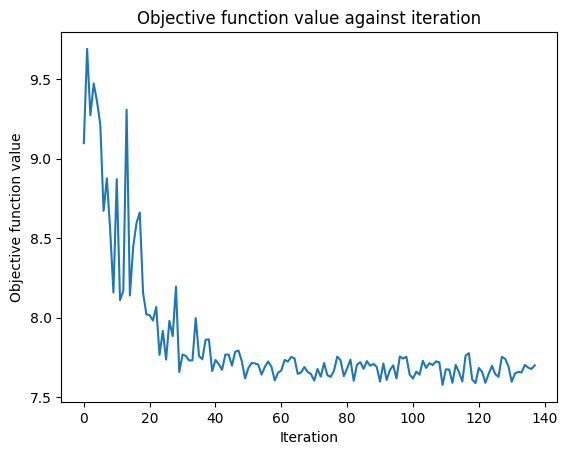

In [ ]:

# Initialize objective_func_vals before using it in callback_graph
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    # plt.pause(0.1)
    # plt.draw()
    # plt.ion()
    plt.show()


classifier = NeuralNetworkClassifier(
    neural_network=qnn,
    loss='cross_entropy',
    optimizer=COBYLA(maxiter=300),
    warm_start=True,
    callback=callback_graph,
)
# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train_pca, y_train)

# print(f"Original training data shape: {X_train_pca.shape}, Labels: {y_train.shape}")
# print(f"Resampled training data shape: {X_train_resampled.shape}, Labels: {y_train_resampled.shape}")

classifier.fit(X_train_qcnn, y_train)



# Accuracy of the train dataset and Testing

In [ ]:
train_score = classifier.score(X_train_pca, y_train)
test_score = classifier.score(X_test_pca, y_test)
print(f"Training accuracy: {train_score:.2f}, Test accuracy: {test_score:.2f}")

Training accuracy: 0.25, Test accuracy: 0.26


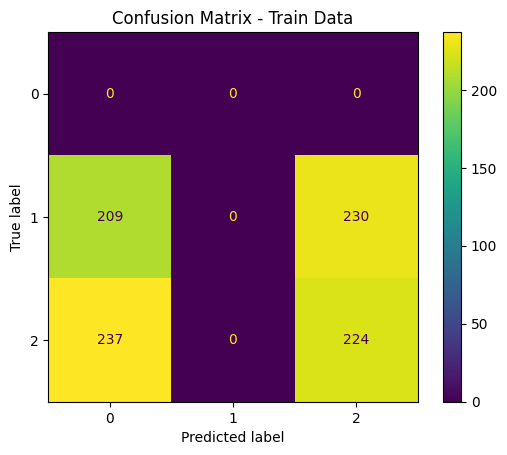

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib  # for saving sklearn model

# 🔍 Confusion Matrix
y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Train Data")
plt.show()




Model saved as 'qcnn_classifier_modified_tumor2.pkl'.


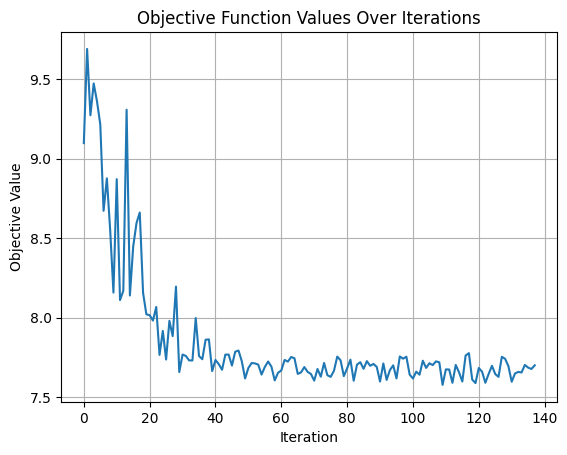

<Figure size 640x480 with 0 Axes>

In [ ]:
# 💾 Save model
joblib.dump(classifier, "qcnn_classifier_modified_tumor2.pkl")
print("Model saved as 'qcnn_classifier_modified_tumor2.pkl'.")
# 📈 Optional: Plot loss or objective function if available
if len(objective_func_vals) > 0:
    plt.plot(objective_func_vals)
    plt.title("Objective Function Values Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Value")
    plt.grid(True)
    plt.show()
    plt.savefig("loss.png")
else:
    print("No objective function values to plot.")

# To seen the image


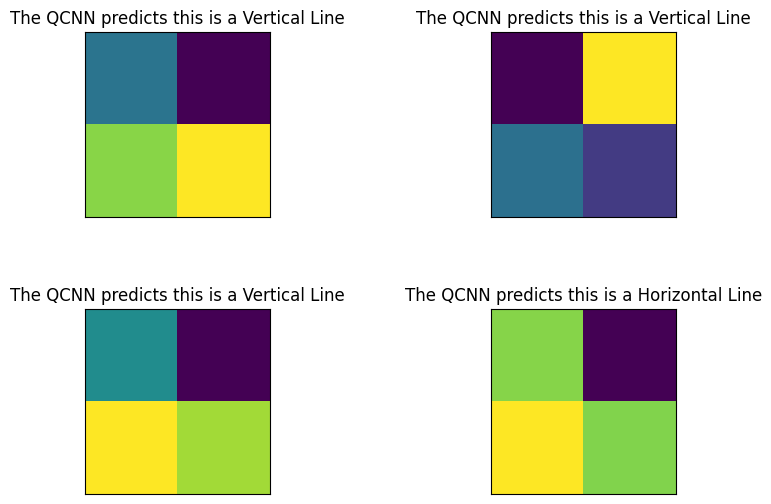

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for i in range(4):
    ax[i // 2, i % 2].imshow(X_test_qcnn[i].reshape(2, 2), aspect="equal")
    if y_pred[i] == -1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is a Horizontal Line")
    if y_pred[i] == +1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is a Vertical Line")
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.savefig("img.png")

In [ ]:
print(X_test_qcnn[100])
print(y_test[100])

[0.52975876 0.44967895 0.0862398  0.01231997]
0


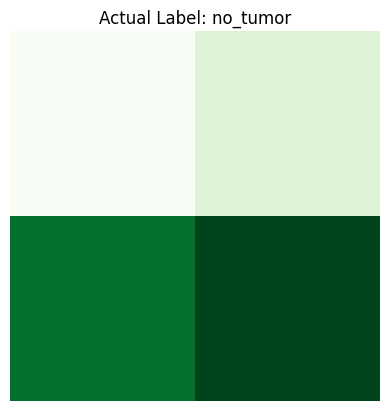

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Test image
i = 0  # koi bhi index
sample = X_test_qcnn[100]  # 1D array of features
label = y_test[100]

# Visualize it (example: 4 features → 2x2 reshaping)
plt.imshow(sample.reshape(2, 2), cmap='Greens_r')
plt.title(f"Actual Label: {'yes_tumor' if label == 1 else 'no_tumor'}")
plt.axis('off')
plt.show()
plt.savefig("notumor.png")

In [ ]:
import matplotlib.pyplot as plt

# Test image
i = 0  # random  index
sample = X_test_qcnn[100]  # 1D array of features
label = y_test[100]

# Visualize it (example: 4 features → 2x2 reshaping)
plt.imshow(sample.reshape(2, 2), cmap='Greens_r')
plt.title(f"Actual Label: {'yes_tumor' if label == 1 else 'no_tumor'}")
plt.axis('off')
plt.show()
plt.savefig("notumor.png")

Predicted: notumor 


# Test image prediction

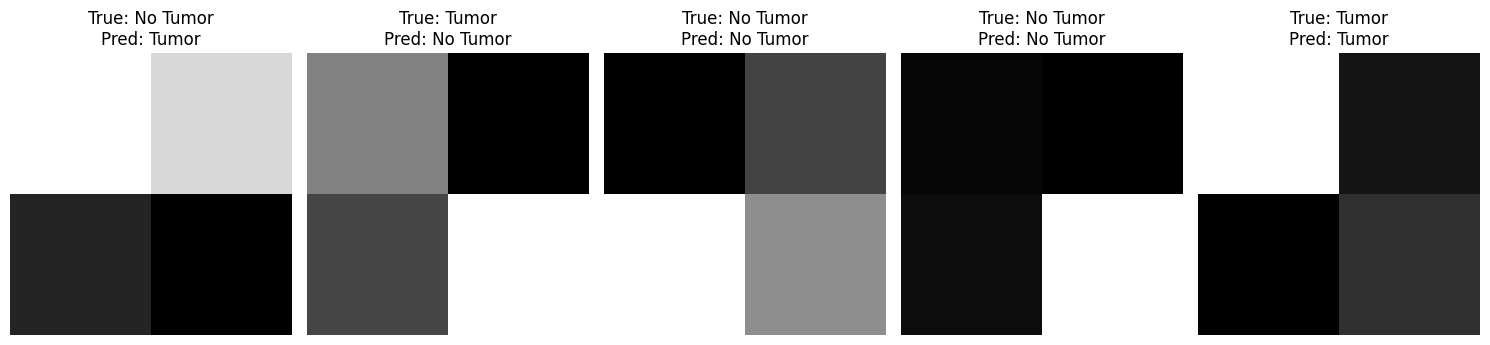

In [ ]:
# For test image
import matplotlib.pyplot as plt
import random

# Randomly cheack five test image
sample_indices = random.sample(range(len(X_test_pca)), 5)

plt.figure(figsize=(15,5))
for i, idx in enumerate(sample_indices, 1):
    # image resize and index
    img = X_test[idx]
    true_label = "Tumor" if y_test[idx] == 1 else "No Tumor"

    # prediction
    img_processed = img.reshape(1, -1)  # Reshape of  QCNN
    pred = classifier.predict(img_processed)[0]
    pred_label = "Tumor" if pred == 1 else "No Tumor"

    # For Visualization
    plt.subplot(1, 5, i)
    plt.imshow(img.reshape(2,2), cmap='gray')  # 2x2 image
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# To make the confusion matrix

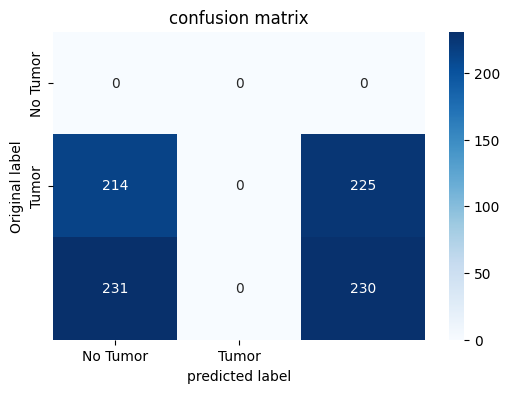

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediction
y_pred = classifier.predict(X_test_pca)

# ConFusionMatrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('Original label')
plt.show()

# To cheack the image from folder

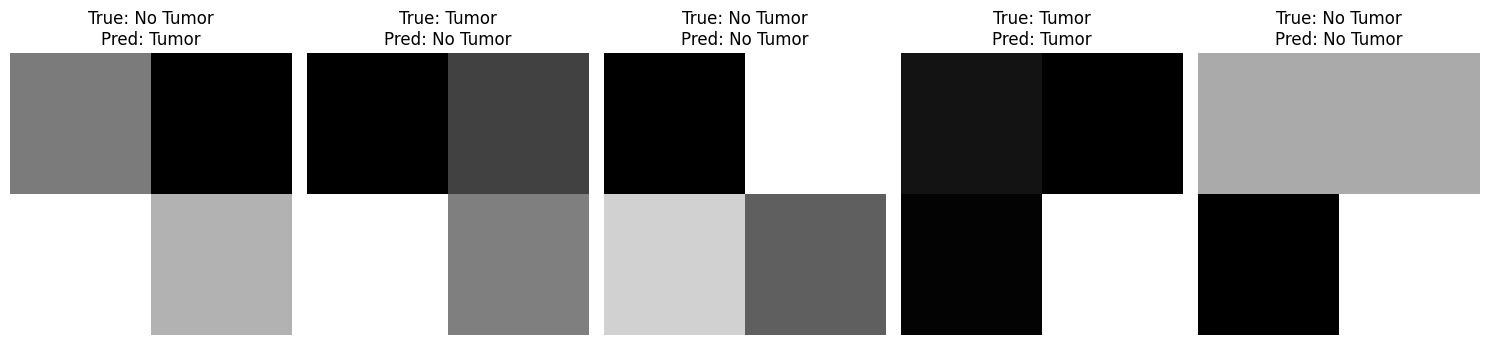

In [ ]:
import random # Randomly cheack

# To choose the 5 random data
random_indices = random.sample(range(len(X_test)), 5)

plt.figure(figsize=(15,5))
for i, idx in enumerate(random_indices, 1):
    # Original image risize 2*2
    original_img = X_test[idx]

    # Prediction
    pred = classifier.predict(X_test_pca[idx].reshape(1,-1))[0]

    plt.subplot(1,5,i)
    plt.imshow(original_img, cmap='gray')
    plt.title(f"True: {'Tumor' if y_test[idx]==1 else 'No Tumor'}\nPred: {'Tumor' if pred==1 else 'No Tumor'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in y_pred:", np.unique(y_pred))


Unique labels in y_test: [0 1]
Unique labels in y_pred: [-1.  1.]


# Important matrix

In [ ]:
# Convert y_pred from [-1, 1] to [0, 1]
y_pred_corrected = np.where(y_pred == -1, 0, 1)

# Now you can generate the classification report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_corrected,
                            target_names=['No Tumor', 'Tumor']))


Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.48      0.49      0.48       439
       Tumor       0.51      0.50      0.50       461

    accuracy                           0.49       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.49      0.49      0.49       900



# PCA Feature Visualization

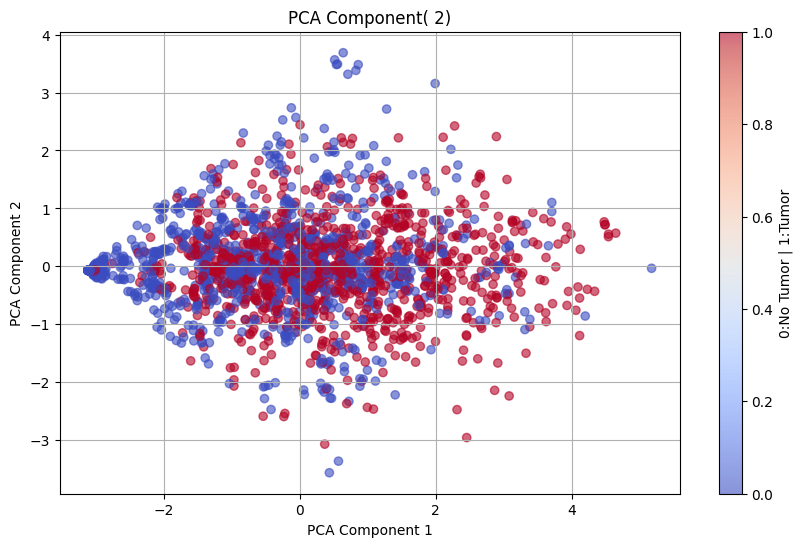

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title('PCA Component( 2)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='0:No Tumor | 1:Tumor')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict entire test set
y_pred = classifier.predict(X_test_pca)

# Kabhi-kabhi Qiskit -1 de deta hai, usse 0 bana lo
y_pred = np.where(y_pred == -1, 0, y_pred)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Tumor', 'Tumor']))


Accuracy: 0.49666666666666665

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.48      0.49      0.49       439
       Tumor       0.51      0.50      0.51       461

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.50      0.50      0.50       900



# Import feature(PCA)

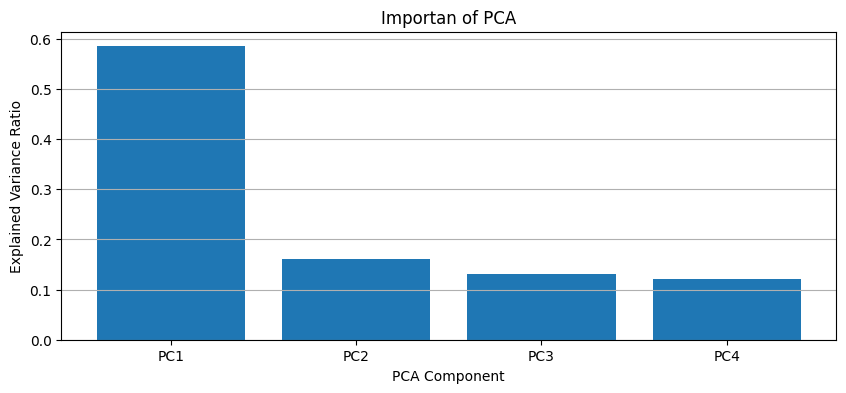

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(range(4), pca.explained_variance_ratio_)
plt.title('Importan of PCA')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(4), ['PC1','PC2','PC3','PC4'])
plt.grid(axis='y')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import joblib

path = '/content/drive/MyDrive/Tumor/Br35H-Mask-qCNN/qcnn_classifier_modified_tumor2.pkl'
classifier = joblib.load(path)


Image: /content/drive/MyDrive/Tumor/Br35H-Mask-qCNN/no_tumor/No15.jpg
Prediction: Tumor (1)
Confidence (single class): 0.18


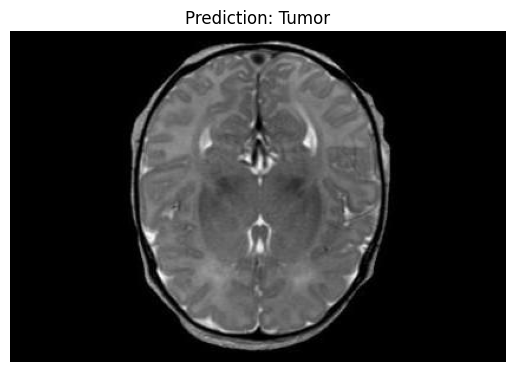

In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

def check_single_image(image_path, classifier_model):
    # 1. Load scaler and PCA
    with open('/content/drive/MyDrive/Tumor/Br35H-Mask-qCNN/scaler2.pkl', 'rb') as f:
        scaler = pickle.load(f)
    with open('/content/drive/MyDrive/Tumor/Br35H-Mask-qCNN/pca2.pkl', 'rb') as f:
        pca = pickle.load(f)

    # 2. Preprocess image
    def preprocess_image(img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"❌ Does not download image : {img_path}")
        img_resized = cv2.resize(img, (2, 2))
        angles = (img_resized.flatten() / 255.0) * (np.pi / 2)
        scaled = scaler.transform([angles])
        pca_features = pca.transform(scaled)
        return pca_features

    # 3. Predict
    processed_img = preprocess_image(image_path)
    prediction = classifier_model.predict(processed_img)
    proba = classifier_model.predict_proba(processed_img) if hasattr(classifier_model, 'predict_proba') else None

    # 4. Print result
    print(f"Image: {image_path}")
    print(f"Prediction: {'Tumor (1)' if prediction[0] == 1 else 'No Tumor (0)'}")
    if proba is not None:
        if proba.shape[1] == 2:
            print(f"Confidence: Tumor={proba[0][1]:.2f}, No Tumor={proba[0][0]:.2f}")
        else:
            print(f"Confidence (single class): {proba[0][0]:.2f}")

    # 5. Show image
    img_display = cv2.imread(image_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.title(f"Prediction: {'Tumor' if prediction[0] == 1 else 'No Tumor'}")
    plt.axis('off')
    plt.show()

# Run the function
image_path = "/content/drive/MyDrive/Tumor/Br35H-Mask-qCNN/no_tumor/No15.jpg"
check_single_image(image_path, classifier)
